In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
from scipy.stats import pearsonr 
import matplotlib.pyplot as plt
import glob
import os
import time
import xarray as xr

# import dask.array as da
from dask.diagnostics import ProgressBar
from dask.distributed import Client, LocalCluster

In [6]:
which_year = 2017

In [25]:
# fname = '~/Documents/projects/thesis/results/output/compiled_SUPERsnow.nc' #ARS
fname = '~/Documents/research/sierra/data/compiled_SUPERsnow.nc' #BSU

def load_lidar(fname, dates, peak=False):

    #~~~~~ ds full
    ds = xr.open_dataset(fname,  chunks={'time':1,'x':1000,'y':1000})
    
    if peak:
    #~~~~~ ds peak
        d_peak = ds.isel(time=[0,7,18,30,42,49]) #0,7,22,28,41,49]

        ds = d_peak
        d_peak.close()
    
    
    else:
    #~~~~~ds slice    
        if type(dates) == list:
            
            d_slice=ds.sel(time=slice('{},{}'.format(dates[0],dates[1])))

            ds = d_slice
            d_slice.close()
            
        else:
    #~~~~~ds one_year
            years = dates
            d_1year = ds.sel(time='{}'.format(years))

            ds = d_1year
            d_1year.close()
            
    ds.close()
    return ds

In [31]:
#call it
ds = load_lidar(fname, [2016,2018])
ds.time

<xarray.DataArray 'time' (time: 40)>
array(['2013-04-03T00:00:00.000000000', '2013-04-29T00:00:00.000000000',
       '2013-05-03T00:00:00.000000000', '2013-05-25T00:00:00.000000000',
       '2013-06-01T00:00:00.000000000', '2013-06-08T00:00:00.000000000',
       '2014-03-23T00:00:00.000000000', '2014-04-07T00:00:00.000000000',
       '2014-04-13T00:00:00.000000000', '2014-04-20T00:00:00.000000000',
       '2014-04-28T00:00:00.000000000', '2014-05-02T00:00:00.000000000',
       '2014-05-11T00:00:00.000000000', '2014-05-17T00:00:00.000000000',
       '2014-05-27T00:00:00.000000000', '2014-05-31T00:00:00.000000000',
       '2014-06-05T00:00:00.000000000', '2015-02-18T00:00:00.000000000',
       '2015-03-06T00:00:00.000000000', '2015-03-25T00:00:00.000000000',
       '2015-04-03T00:00:00.000000000', '2015-04-09T00:00:00.000000000',
       '2015-04-15T00:00:00.000000000', '2015-04-27T00:00:00.000000000',
       '2015-05-01T00:00:00.000000000', '2015-05-28T00:00:00.000000000',
       '2015-0

In [29]:
fname = '~/Documents/research/sierra/data/compiled_SUPERsnow.nc' #BSU
ds = xr.open_dataset(fname,  chunks={'time':1,'x':1000,'y':1000})
dates = [2015, 2017]
d_slice=ds.sel(time=slice('{},{}'.format(dates[0],dates[1])))
d_slice


TypeError: list() takes at most 1 argument (2 given)

In [3]:
# fname = '~/Documents/projects/thesis/results/output/compiled_SUPERsnow.nc' #ARS
fname = '~/Documents/research/sierra/data/compiled_SUPERsnow.nc' #BSU

#~~~~ ds full
ds = xr.open_dataset(fname,  chunks={'time':1,'x':1000,'y':1000})
ds.close 
ds

#~~~~~~~~~~~~~~ds small
dsmall = ds.sel(time='{}'.format(which_year))
dsmall.close()

ds = dsmall
ds.close()

# #~~~~ ds peak
# dpeak = ds.isel(time=[0,7,18,30,42,49]) #0,7,22,28,41,49]
# dpeak.close()

# ds = dpeak
# ds.close()
# ds

NameError: name 'which_year' is not defined

## summary stats for each lidar flight

In [10]:
#mean
mean_snow_depth = ds.snow.mean(dim=('x','y'))

#standard deviation
stdv_snow_depth = ds.snow.std(dim=('x','y'))

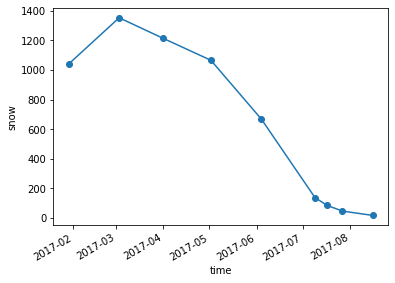

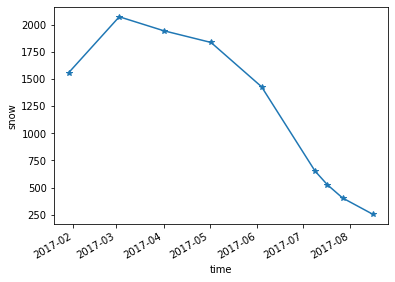

In [11]:
plt.figure()
mean_snow_depth.plot(marker='o')

plt.figure()
stdv_snow_depth.plot(marker='*')

In [12]:
stdv_snow_depth.values

array([1559.4952207 , 2073.78835117, 1945.351153  , 1836.94645502,
       1429.30793697,  651.98272118,  526.53259854,  403.76950713,
        251.88387271])

## std for each year

In [26]:
ds
# d=ds.sel(time=slice('2015','2017'))
d=ds.sel(time=slice('2015':))
d

SyntaxError: invalid syntax (<ipython-input-26-bb5338a22bc2>, line 3)

In [33]:
loadASO(fname, which_year=2018)

<xarray.Dataset>
Dimensions:  (time: 51, x: 17569, y: 17002)
Coordinates:
  * x        (x) float32 254007.0 254010.0 254013.0 ... 306708.0 306711.0
  * y        (y) float32 4230327.0 4230324.0 4230321.0 ... 4179327.0 4179324.0
  * time     (time) datetime64[ns] 2013-04-03 2013-04-29 ... 2018-05-28
    mask     (y, x) uint8 dask.array<chunksize=(1000, 1000), meta=np.ndarray>
    dem      (y, x) float32 dask.array<chunksize=(1000, 1000), meta=np.ndarray>
    veg      (y, x) float32 dask.array<chunksize=(1000, 1000), meta=np.ndarray>
Data variables:
    snow     (time, y, x) int16 dask.array<chunksize=(1, 1000, 1000), meta=np.ndarray>